# GRIP : The Sparks Foundation

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN

## TASK-1 : Prediction using Supervised ML

## INFORMATION

AIM: To predict the percentage of a student based on the number of Study Hours

LANGUAGE: PYTHON 3

IDE: Jupyter Notebook

TYPE: Linear Regression

SUBMITTED BY: MAYURA NANDAN M R

## IMPORTING ALL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### READING THE DATASET

In [2]:
#reading data from the remote link 
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
st_data = pd.read_csv(url)

print("Data imported successfully!")
st_data

Data imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### DISPLAYING FIRST 10 STUDENT DATA

In [3]:
#Displaying first 10 student data
print("The first 10 students data is displayed")
st_data.head(10)

The first 10 students data is displayed


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
st_data.shape

(25, 2)

In [6]:
st_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#we can observe that there are no null values in the data set
st_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### DATA VISUALIZATION

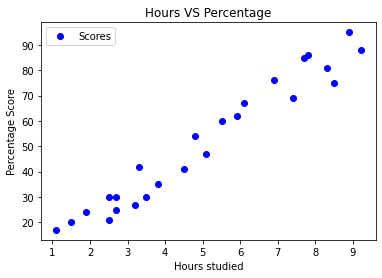

In [9]:
#plotting the destribution of scores and number of hours studied
st_data.plot(x='Hours' , y='Scores', style='bo')
plt.title('Hours VS Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

A POSITIVE LINEAR RELATION BETWEEN THE NUMBER OF HOURS STUDIED AND PERCENTAGE OF SCORE IS SEEN IN THE GRAPH

### PREPARING THE DATA :

In [10]:
x = st_data.iloc[:, :-1].values
y = st_data.iloc[:, 1].values

In [11]:
#number of hours studied
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [12]:
#Obtained scores
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [13]:
# we split the data into train and test datasets using SK learn's built in function train_test_split()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [15]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [16]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [17]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

### DESIGN AND TRAIN ML MODEL

In [18]:
#Training
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("TRAINING COMPLETE.")

TRAINING COMPLETE.


### VISUALIZING THE MODEL

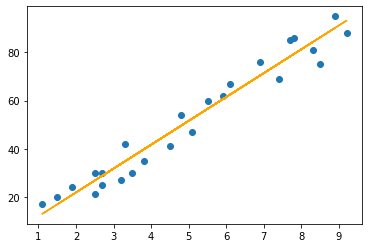

In [19]:
# plotting the regression line
line = regressor.coef_*x+regressor.intercept_  

#plotting for the test data
plt.scatter(x, y)
plt.plot(x,line,color='orange');
plt.show()

In [20]:
#Testing data in hours
print(X_test)  
#Predicting the scores
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
#Comparing Actual VS Predicted Data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred })
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
#testing with a particular data of 9.5 hours/day
hours = 9.5
own_pred = regressor.predict([[hours]])
print(f"No of hours = {hours}")
print(f"Predicted score = {own_pred[0]}")

No of hours = 9.5
Predicted score = 96.16939660753593


### EVALUATING THE MODEL

It is important to evaluate performance of any algorithm to compare how well different algorithms perform on a particular data set.

### MEAN ABSOLUTE ERROR

In [24]:
#Mean Absolute Error
from sklearn import metrics
print('Mean Absoulte Error: ',metrics.mean_absolute_error(y_test, y_pred))

Mean Absoulte Error:  4.183859899002975


### MAX ERROR

In [25]:
#Max Error
print('Max error:',metrics.max_error(y_test,y_pred))

Max error: 6.732260779489842


### MEAN SQUARED ERROR

In [26]:
#Mean Squared Error
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error:  21.5987693072174


### THANK YOU